# Setup

Initialise python libraries

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from google.colab import drive
from pathlib import Path

print("numpy: ", np.version.version);

numpy:  1.18.5


Mount Google Drive

In [ ]:
#drive_home = Path('/content/drive')
#if (not drive_home.is_dir()):
#  drive.mount(str(drive_home))
#
#data_home = drive_home / 'My Drive/study/machine-learning/machine-learning-ex2/ex2'
#data_path = data_home / 'ex2data1.txt'

In [ ]:
# Install PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Import extdata1.txt file
data_id = '1p1opAPO5BgrzB_b-mquHJt3CnHs7D0Pk'
data_path = 'ex2data1.txt'
downloaded = drive.CreateFile({'id':data_id})
downloaded.GetContentFile(data_path)

# Load data

Load and inspect data

In [ ]:
data = pd.read_csv(data_path, header=None, names=['Exam 1 score', 'Exam 2 score', 'Admitted'])
data.head()

,Exam 1 score,Exam 2 score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Describe data

In [ ]:
data.describe()

,Exam 1 score,Exam 2 score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Plot data

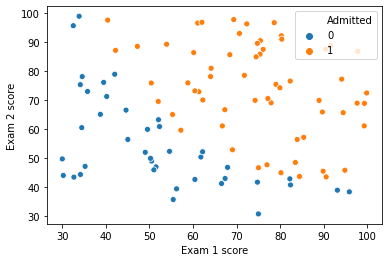

In [ ]:
sns.scatterplot(x="Exam 1 score", y="Exam 2 score", hue="Admitted", data=data);

# Logistic Regression Optimisation Functions


Define cost and gradient optimisation functions

In [ ]:
# sigmoid(z)
# sigmoid function 1 / (1 + e^-z)
#
def sigmoid(z):

  g = np.power(np.exp(-z) + 1, -1);

  return g

# computeHypothesis(X, theta)
# Compute hypothesis for logistic regression
#
def computeHypothesis(X, theta):
  #print("Size X: ", X.shape, " theta: ", theta.shape)

  # number of training examples
  m = X.shape[0];

  # boundary
  z = X * theta;

  # hypothesis
  h = sigmoid(z);

  return h;

# computeCost(X, y, theta)
# Compute cost for linear regression
#
# Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
def computeCost(X, y, theta):
  #print("Size X: ", X.shape, " y: ", y.shape, " theta: ", theta.shape)

  # number of training examples
  m = y.shape[0];

  # hypothesis
  h = computeHypothesis(X, theta);

  # cost matrix
  J_matrix = np.multiply(np.log(h), -y) - np.multiply(np.log(-h + 1), -y + 1);

  # cost
  J = np.sum(J_matrix)*(1/m);

  return J

# computeGradient(X, y, theta)
# Compute gradient for logistic regression
#
# Computes the gradient using theta as the parameter for logistic regression to fit the data points in X and y
def computeGradient(X, y, theta):
  #print("Size X: ", X.shape, " y: ", y.shape, " theta: ", theta.shape)

  # number of training examples
  m = y.shape[0];

  # hypothesis
  h = computeHypothesis(X, theta);

  # hypothesis error
  h_error = h - y;
  h_error_normalised = np.tile(h_error, (1, X.shape[1]));

  #gradient
  grad = np.multiply(h_error_normalised, X).sum(axis=0).T * (1/m);

  return grad

# cost function for use with fmin_tnc
def costFunction(theta_array, X, Y):

  # convert 1D array to vector
  theta = theta_array.reshape(-1, 1);

  # number of training examples
  m = y.shape[0];

  # hypothesis
  h = sigmoid(X*theta)

  # cost matrix
  J_matrix = np.multiply(np.log(h), -y) - np.multiply(np.log(-h + 1), -y + 1);

  # cost
  J = np.sum(J_matrix)*(1/m);

  # hypothesis error
  h_error = h - y;
  h_error_normalised = np.tile(h_error, (1, X.shape[1]));

  #gradient
  #IMPORTANT Note, fmin_tnc expects gradient to be array rather than vector.
  grad_vector = np.multiply(h_error_normalised, X).sum(axis=0).T * (1/m);
  grad = grad_vector.flatten();

  return (J, grad);


# gradientDescent(X, y, theta, alpha, iters)
# Performs gradient descent to learn theta
#
# Updates theta by taking iters gradient steps with learning rate alpha
def gradientDescent(X, y, theta, alpha, iters):

  # number of training examples
  m = y.shape[0];

  cost = np.zeros(iters);

  for i in range(iters):
    ## hypothesis
    #h = computeHypothesis(X, theta);
    #
    ## hypothesis error
    #h_error = h - y;
    #h_error_normalised = np.tile(h_error, (1, X.shape[1]));
    #
    ##gradient
    #grad = np.multiply(h_error_normalised, X).sum(axis=0).T * (1/m);
    ##temp1 = np.multiply(h_error_normalised, X);
    ##temp2 = temp1.sum(axis=0);
    ##grad = temp2.T * (1/m);
    
    #gradient
    grad = computeGradient(X, y, theta);

    #calculate new theta
    theta = theta - (grad * alpha);

    cost[i] = computeCost(X, y, theta);
  
  return theta, cost


Test sigmoid function

In [ ]:
xhigh = sigmoid(100);
xlow = sigmoid(-100);
xzero = sigmoid(0);
xpass = sigmoid(1);
print("sigmoid high: {:0.6f}, low: {:0.6f}, zero: {}, pass: {:0.6f}".format(xhigh, xlow, xzero, xpass));

X_test = np.matrix([[100],[-100],[0],[1]]);

sigmoid_result = sigmoid(X_test);
print("sigmoid matrix high: {:0.6f}, low: {:0.6f}, zero: {}, pass: {:0.6f}".format(sigmoid_result[0,0], sigmoid_result[1,0], sigmoid_result[2,0], sigmoid_result[3,0]));

y_test = np.matrix([[1],[0],[0],[1]]);
theta_test = np.matrix(np.zeros((X_test.shape[1], 1), dtype=int))

cost_test = computeCost(X_test, y_test, theta_test);
print("cost: {:0.6f}".format(cost_test));


sigmoid high: 1.000000, low: 0.000000, zero: 0.5, pass: 0.731059
sigmoid matrix high: 1.000000, low: 0.000000, zero: 0.5, pass: 0.731059
cost: 0.693147


Prepare and describe data matrices

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# append a ones column to the front of the feature matrix to support the theta0 constant parameter
X.insert(0, 'Ones', 1)

# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)

# set theta parameters to zero vector with rows equal to number of features + 1
# (including the theta0 constant parameter), e.g. rows equal to columns in X
theta = np.matrix(np.zeros((X.shape[1], 1), dtype=int))

print("X: ", X.shape, " y: ", y.shape, " theta: ", theta.shape)

X:  (100, 3)  y:  (100, 1)  theta:  (3, 1)


# Run optimisation

## Configuration 1

```
theta = [0, 0, 0]
```




In [ ]:
# initialise theta to [0, 0, 0]
theta_initial = np.matrix(np.zeros((X.shape[1], 1), dtype=int));

#cost = computeCost(X, y, theta_initial);
#grad = computeGradient(X, y, theta_initial);
(cost, grad) = costFunction(theta_initial, X, y)

with np.printoptions(precision=6, suppress=True):
  print("Initial theta:\n", theta_initial, "\ncost: ", "{:0.6f}".format(cost), "\ngradient:\n", grad);

Initial theta:
 [[0]
 [0]
 [0]] 
cost:  0.693147 
gradient:
 [[ -0.1      -12.009217 -11.262842]]


In [ ]:
# perform tnc optimisation to "fit" the model parameters
import scipy.optimize as opt

theta_initial = np.matrix(np.zeros((1, X.shape[1]), dtype=int));

# The x0 parameter is the initial guess so I will set that to initial_theta.
result = opt.fmin_tnc(func=costFunction, x0=theta_initial, args=(X, y))

theta_optimised = result[0]
(cost, grad) = costFunction(theta_optimised, X, y)

with np.printoptions(precision=6, suppress=True):
  print("Optimised theta:\n", theta_optimised, "\ncost: ", "{:0.6f}".format(cost), "\ngradient:\n", grad);

Optimised theta:
 [-25.161319   0.206232   0.201471] 
cost:  0.203498 
gradient:
 [[0. 0. 0.]]


Plot prediction

In [ ]:
#TODO

Plot error

In [ ]:
#TODO

## Configuration 2

```
theta = [-24, 0.2, 0.2]
```




In [ ]:
# initialise theta to [-24,0.2,0.2]
theta_initial = np.matrix([[-24],[0.2],[0.2]]);

#cost = computeCost(X, y, theta_initial);
#grad = computeGradient(X, y, theta_initial);
(cost, grad) = costFunction(theta_initial, X, y)

with np.printoptions(precision=6, suppress=True):
  print("Initial theta:\n", theta_initial, "\ncost: ", "{:0.6f}".format(cost), "\ngradient:\n", grad);

Initial theta:
 [[-24. ]
 [  0.2]
 [  0.2]] 
cost:  0.218330 
gradient:
 [[0.042903 2.566234 2.646797]]


In [ ]:
# perform tnc optimisation to "fit" the model parameters
import scipy.optimize as opt

theta_initial = np.matrix(np.zeros((1, X.shape[1]), dtype=int));

# The x0 parameter is the initial guess so I will set that to initial_theta.
result = opt.fmin_tnc(func=costFunction, x0=theta_initial, args=(X, y))

theta_optimised = result[0]
(cost, grad) = costFunction(theta_optimised, X, y)

with np.printoptions(precision=6, suppress=True):
  print("Optimised theta:\n", theta_optimised, "\ncost: ", "{:0.6f}".format(cost), "\ngradient:\n", grad);

Optimised theta:
 [-25.161319   0.206232   0.201471] 
cost:  0.203498 
gradient:
 [[0. 0. 0.]]


Plot prediction

In [ ]:
#TODO

Plot error

In [ ]:
#TODO